In [137]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import nsfg
import thinkstats2
import math as mt
import thinkplot

In [5]:
data=nsfg.ReadFemResp()
resp=pd.DataFrame(data)

In [13]:
school=resp[resp["hieduc"]<=10]
university=resp[resp["hieduc"]>10]

In [29]:
print "-University Descriptive Statistics-"
print "Mean is:",university["agemomb1"].mean()
print "Median is:",university["agemomb1"].median()
print "Mode is:",university["agemomb1"].mode()[0]
print "Std is:",np.std(university["agemomb1"], axis=0)
print "Variance is:",np.std(university["agemomb1"], axis=0)**2

-University Descriptive Statistics-
Mean is: 4.37902097902
Median is: 3.0
Mode is: 3
Std is: 11.1402764933
Variance is: 124.105760347


In [30]:
print "-School Descriptive Statistics-"
print "Mean is:",school["agemomb1"].mean()
print "Median is:",school["agemomb1"].median()
print "Mode is:",school["agemomb1"].mode()[0]
print "Std is:",np.std(school["agemomb1"], axis=0)
print "Variance is:",np.std(school["agemomb1"], axis=0)**2

-School Descriptive Statistics-
Mean is: 3.82720989451
Median is: 3.0
Mode is: 3
Std is: 10.6765999778
Variance is: 113.989787086


In [31]:
#Here we can say that mean of age of moms of universities are greater.
#std values are similar so we can say that both values have the similar distances from the mean

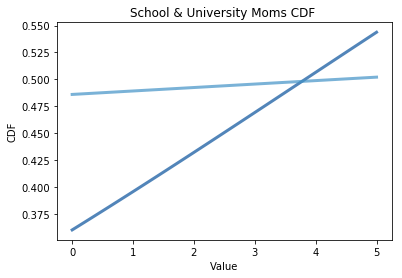

In [131]:
thinkplot.PrePlot(2)

mus = [school["agemomb1"].mean(),university["agemomb1"].mean()]
sigmas = [np.std(school["agemomb1"], axis=0),np.std(university["agemomb1"], axis=0)**2]

for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=0, high=5)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='School & University Moms CDF ', xlabel='Value', ylabel='CDF',
                 loc='upper left')

In [129]:
def PMF_Drawer(firsts, others):

    first_pmf = thinkstats2.Pmf(firsts, label='School')
    other_pmf = thinkstats2.Pmf(others, label='University')
    width = 0.5

    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(first_pmf, align='right', width=width)
    thinkplot.Hist(other_pmf, align='left', width=width)
    thinkplot.Config(xlabel='value',
                     ylabel='Prob.')
    

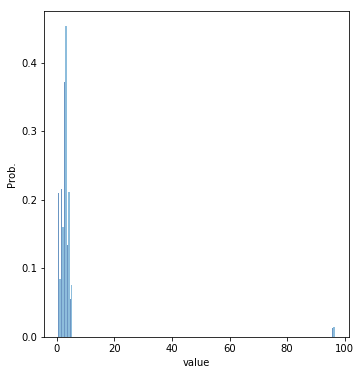

In [130]:
PMF_Drawer(school["agemomb1"],university["agemomb1"])

In [125]:
def difference(firsts, others):

    first_pmf = thinkstats2.Pmf(firsts, label='School')
    other_pmf = thinkstats2.Pmf(others, label='University')
  
    values = range(1, 6)
    diffs = []
    for value in values:
        p1 = first_pmf.Prob(value)
        p2 = other_pmf.Prob(value)
        diff = 100 * (p1 - p2)
        diffs.append(diff)

    thinkplot.Bar(values, diffs)
    thinkplot.Config(title='Difference in PMFs',xlabel='values',ylabel='percentage points',legend=False)

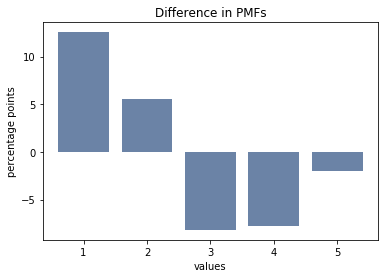

In [126]:
difference(school["agemomb1"],university["agemomb1"])

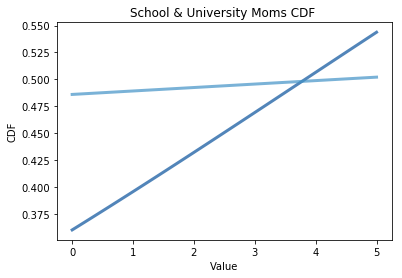

In [154]:
thinkplot.PrePlot(2)

mus = [school["agemomb1"].mean(),university["agemomb1"].mean()]
sigmas = [np.std(school["agemomb1"], axis=0),np.std(university["agemomb1"], axis=0)**2]

for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=0, high=5)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='School & University Moms CDF ', xlabel='Value', ylabel='CDF',
                 loc='upper left')

In [175]:
uni_c=thinkstats2.Cdf(university["agemomb1"])
school_c=thinkstats2.Cdf(school["agemomb1"])

prob_school_less_than_18=school_c.Prob(1)
prob_uni_less_than_18=uni_c.Prob(1)
remaining_uni=1-uni_c.Prob(1)
remaining_school=1-school_c.Prob(1)

In [172]:
prob_school_less_than_18

0.20953073845034559

In [173]:
prob_uni_less_than_18

0.083916083916083919

In [176]:
remaining_uni

0.91608391608391604

In [177]:
remaining_school

0.79046926154965447

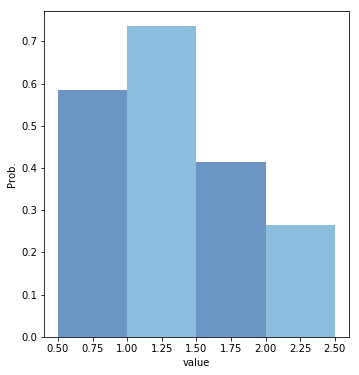

In [180]:
PMF_Drawer(school["intctfam"],university["intctfam"])

In [183]:
#I picked this because they have similar values so I want to see it in pmf

In [184]:
#references:
#thinkstats2 book
#week7 exercise file